# Sparse Dictionary Learning Tests

In this notebook we will be preforming tests to show the abilities of our sparse dictionary learning algorithm.

In [34]:
import numpy as np
import random
import cv2
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%run Classes.py

### Evaluation Criteria

We will be using MSE and the Stochastic Partial Image Reconstruction to estimate error.

## Task 1: Image Compression/Reconstruction

This task is to take a single image, compress it (patch by patch) with sparse coding, and then reconstruct it. We will do this in two different ways: One way is by training our dictionary on a group of sample images, the other is by training using only the single test image. The purpose of the second method is to get a "best case" scenario of our algorithms preformance.


***Method A: Same Image Training***
Here we will train our dictionary on a single image, the same image that we will be testing on. The purpose of this is to get a "best case" scenario of our algorithms preformance.

***Method B: Multiple Image Training***
Here we will train our dictionary on a group of images, and then test it on an unseen test image.


In [6]:
learner = DictionaryLearner()

In [19]:
img = cv2.imread('Original Images/cheese_board.jpg')
img.shape[:2] / np.array([20,20])

array([153.6, 204. ])

In [10]:
# Load the image
img = cv2.imread('dinner.jpg', cv2.IMREAD_COLOR)

# Resize the image to 400x300 pixels
img_resized = cv2.resize(img, (200, 150), interpolation=cv2.INTER_AREA)

# Convert the resized image to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# Save the grayscale image as 'small_gray_dinner.png'
cv2.imwrite('small_gray_dinner.png', img_gray )

array([[[ 51,  50,  52],
        [ 52,  51,  53],
        [ 55,  54,  56],
        ...,
        [ 22,  28,  39],
        [ 20,  26,  37],
        [ 18,  24,  35]],

       [[ 57,  56,  58],
        [ 58,  57,  59],
        [ 59,  58,  60],
        ...,
        [ 18,  24,  35],
        [ 18,  24,  35],
        [ 19,  25,  36]],

       [[ 56,  55,  57],
        [ 56,  55,  57],
        [ 57,  56,  58],
        ...,
        [ 19,  25,  36],
        [ 20,  26,  37],
        [ 20,  26,  37]],

       ...,

       [[ 96, 108, 118],
        [103, 115, 125],
        [103, 115, 125],
        ...,
        [112, 110, 122],
        [111, 110, 120],
        [111, 110, 120]],

       [[ 93, 105, 115],
        [104, 116, 126],
        [105, 117, 127],
        ...,
        [112, 110, 122],
        [113, 109, 120],
        [114, 110, 121]],

       [[ 90, 102, 112],
        [104, 116, 126],
        [107, 119, 129],
        ...,
        [111, 109, 121],
        [113, 109, 120],
        [114, 110, 121]]

In [20]:
paths = ['cheese_board.jpg', 'chicken_n_beans.jpg', 'octopus.jpg', 'tea_eggs.jpg', 'persimmon_tomato_salad.jpg']

In [32]:
paths = ['Compressed Images/cheese_board.jpg']
new_path = 'Reconstructed Images/cheese_boardL'
N = 512
K = 256
I = 10
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

In [35]:

with open('Graphs/cheese_board_dictionaries.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)


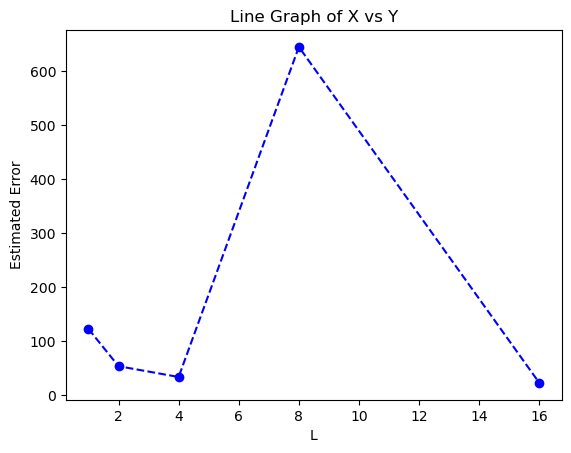

In [31]:
xs = Ls
ys = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()


In [ ]:
paths = ['Compressed Images/chicken_n_beans.jpg']
new_path = 'Reconstructed Images/chicken_n_beansL'
N = 512
K = 256
I = 1
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = # Depends on what I see, but probably [2, 8, 10, 16]? [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

with open('Graphs/chicken_n_beans.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)